In [24]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
gene_data = pd.read_csv('gene.csv')  # Genes as predictors
phenotype_data = pd.read_csv('phenotype.csv')  # Phenotype as response


In [25]:
gene_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
0,-0.560476,0.253319,-0.710407,0.787739,2.198810,-0.375603,-0.715242,1.014943,-0.073556,1.430402,...,-0.977420,0.194507,0.068960,-0.229256,0.248449,-2.408816,0.214051,0.100760,1.109237,-1.370107
1,-0.230177,-0.028547,0.256884,0.769042,1.312413,-0.561876,-0.752689,-1.992748,-1.168651,1.046629,...,0.568850,-1.314170,0.585650,0.150154,-0.497065,1.506346,-0.501692,-1.182990,-0.980351,0.317840
2,1.558708,-0.042870,-0.246692,0.332203,-0.265145,-0.343917,-0.938539,-0.427279,-0.634748,0.435289,...,-0.860693,-0.283858,-0.518457,-0.549518,-0.936547,1.865752,0.890720,-0.136792,0.664347,0.037140
3,0.070508,1.368602,-0.347543,-1.008377,0.543194,0.090497,-1.052513,0.116637,-0.028842,0.715178,...,-1.734923,1.234941,-0.075372,1.467319,0.256727,1.512094,-0.263262,-1.002138,1.306790,1.593045
4,0.129288,-0.225771,-0.951619,-0.119453,-0.414340,1.598509,-0.437160,-0.893208,0.670696,0.917175,...,2.307422,0.654472,-0.274565,0.914910,-1.467799,1.499690,0.095978,0.002663,-0.899706,0.581864
5,1.715065,1.516471,-0.045028,-0.280395,-0.476247,-0.088565,0.331179,0.333903,-1.650547,-2.660923,...,-1.734741,2.281148,0.674091,-0.644819,-1.131616,0.648958,0.231027,-1.420108,1.531550,1.912200
6,0.460916,-1.548753,-0.784904,0.562990,-0.788603,1.080799,-2.014210,0.411430,-0.349754,1.110277,...,1.223973,-0.080543,0.139601,-0.710379,0.908755,0.137985,0.687157,-0.669473,-1.037245,-1.399179
7,-1.265061,0.584614,-1.667942,-0.372439,-0.594617,0.630754,0.211980,-0.033036,0.756406,-0.484988,...,0.959050,0.381580,-0.522980,-0.947606,0.663591,1.241827,0.023925,0.528450,0.096824,-0.059504
8,-0.686853,0.123854,-0.380227,0.976973,1.650907,-0.113640,1.236675,-2.465898,-0.538809,0.230617,...,-1.083766,0.160541,2.897547,1.564289,-0.209211,-0.971330,0.174104,-1.468418,-0.371666,0.394998
9,-0.445662,0.215942,0.918997,-0.374581,-0.054028,-1.532902,2.037574,2.571458,0.227292,-0.295158,...,-1.346109,-1.611208,-0.724395,-0.361449,-0.890444,0.327364,-0.953180,0.599578,-1.108299,-0.308063


In [26]:
phenotype_data

,V1
0,-311.097535
1,-68.479413
2,289.721130
3,-435.731604
4,46.893067
5,-27.363154
6,474.878695
7,-367.406108
8,-213.329640
9,-98.646458


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm



# Split predictors and response
X = gene_data.iloc[:, :-1]  # All genes (predictors)
y = phenotype_data

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)


In [28]:
# Standardize the predictors (X) and response (y)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


In [29]:
X_train_scaled

array([[ 0.05951237, -1.41946734,  0.25827597, ..., -0.89477591,
         1.22984558,  1.03639278],
       [ 0.29258818, -0.62349014,  0.83974488, ..., -0.64384253,
         0.15646885, -1.05573858],
       [ 0.40673485, -1.78292856, -0.68837699, ...,  0.74922252,
        -0.45107499, -1.05278224],
       ...,
       [ 1.90381272,  0.26938989,  0.50314136, ...,  1.70950601,
         0.95645814, -2.36673263],
       [ 0.8322298 , -0.38244535,  0.43098835, ..., -0.74631784,
        -0.79025312, -0.65998622],
       [ 0.03231947, -0.31707141, -0.87127968, ...,  0.21955758,
         0.23699243, -0.91144891]])

In [30]:
y_train_scaled

array([ 1.35565867,  0.23976548,  1.72289276,  0.58954164, -1.24880875,
        0.99020466,  0.65234501, -1.05215606,  1.45593942, -1.56491833,
        1.20246379,  0.23626348,  2.14495362, -0.67166124, -0.53865157,
       -0.30205435, -1.1246378 ,  0.39272326, -1.70086655,  0.60825657,
        0.7759148 , -0.02296629, -0.27723184,  0.39164529, -1.49220197,
       -0.19554347, -0.05037416,  0.17334497, -2.09991034, -0.08427925,
       -1.00967074, -0.70696663, -0.96095492,  0.61794193,  0.34457316,
        0.99762326,  0.21180252])

In [31]:
# Add intercept column (optional for models with intercept)
X_train_scaled_with_intercept = sm.add_constant(X_train_scaled)
X_test_scaled_with_intercept = sm.add_constant(X_test_scaled)

# Model with intercept
model_with_intercept = sm.OLS(y_train_scaled, X_train_scaled_with_intercept).fit()
model_with_intercept

In [32]:
# Model without intercept
model_without_intercept = sm.OLS(y_train_scaled, X_train_scaled).fit()

# Evaluate both models on the test set
y_pred_with_intercept = model_with_intercept.predict(X_test_scaled_with_intercept)
y_pred_without_intercept = model_without_intercept.predict(X_test_scaled)

print(y_pred_with_intercept)
print(y_pred_without_intercept)

[-0.34766384  0.03710786 -0.03933558 -0.17593138  0.25633661 -0.21486747
 -0.07040391  0.23656785 -0.23697873 -0.04881739  0.1341371  -0.01348721
 -0.07670337]
[-0.34766384  0.03710786 -0.03933558 -0.17593138  0.25633661 -0.21486747
 -0.07040391  0.23656785 -0.23697873 -0.04881739  0.1341371  -0.01348721
 -0.07670337]


In [33]:
mse_with_intercept = mean_squared_error(y_test_scaled, y_pred_with_intercept)
mse_without_intercept = mean_squared_error(y_test_scaled, y_pred_without_intercept)
print(mse_with_intercept)
print(mse_without_intercept)
# Compare the models
print("Model with Intercept MSE (Standardized):", mse_with_intercept)
print("Model without Intercept MSE (Standardized):", mse_without_intercept)

if mse_with_intercept < mse_without_intercept:
    print("The model with an intercept performs better, indicating an intercept is required.")
else:
    print("The model without an intercept performs better, indicating an intercept is not required.")



0.8656688309921263
0.8656688309921265
Model with Intercept MSE (Standardized): 0.8656688309921263
Model without Intercept MSE (Standardized): 0.8656688309921265
The model with an intercept performs better, indicating an intercept is required.


In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Example data loading
X = pd.read_csv("gene.csv")  # Feature matrix (2000 variables)
y = pd.read_csv("phenotype.csv")  # Response variable (single column)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

# Standardize predictors and response
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Add intercept column for models with intercept
X_train_scaled_with_intercept = sm.add_constant(X_train_scaled)
X_test_scaled_with_intercept = sm.add_constant(X_test_scaled)

# Fit models
model_with_intercept = sm.OLS(y_train_scaled, X_train_scaled_with_intercept).fit()
model_without_intercept = sm.OLS(y_train_scaled, X_train_scaled).fit()

# Predictions
y_pred_with_intercept = model_with_intercept.predict(X_test_scaled_with_intercept)
y_pred_without_intercept = model_without_intercept.predict(X_test_scaled)

# Evaluate models using Mean Squared Error
from sklearn.metrics import mean_squared_error

mse_with_intercept = mean_squared_error(y_test_scaled, y_pred_with_intercept)
mse_without_intercept = mean_squared_error(y_test_scaled, y_pred_without_intercept)

print(f"Mean Squared Error (with intercept): {mse_with_intercept}")
print(f"Mean Squared Error (without intercept): {mse_without_intercept}")



Mean Squared Error (with intercept): 0.8650126337604245
Mean Squared Error (without intercept): 0.8650126337604244


In [95]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example data
# X is the feature matrix (2000 regressors, 50 observations)
# y is the response variable (50 observations)
X = pd.read_csv("gene.csv")
y = pd.read_csv("phenotype.csv")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

# Standardize the predictors (X) and response (y)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Ensure the number of samples in X_train and y_train are consistent
print(f"Number of samples in X_train: {X_train_scaled.shape[0]}, y_train: {len(y_train_scaled)}")
print(f"Number of samples in X_test: {X_test_scaled.shape[0]}, y_test: {len(y_test_scaled)}")

# Fit the full model with intercept using Ridge Regression
ridge_full = Ridge(alpha=1.0)  # Regularization strength (lambda)
ridge_full.fit(X_train_scaled, y_train_scaled)

# Fit the restricted model (without intercept) using Ridge Regression
ridge_restricted = Ridge(alpha=1.0, fit_intercept=False)  # No intercept
ridge_restricted.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_full = ridge_full.predict(X_test_scaled)
y_pred_restricted = ridge_restricted.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) for both models
mse_full = mean_squared_error(y_test_scaled, y_pred_full)
mse_restricted = mean_squared_error(y_test_scaled, y_pred_restricted)

rmse_full = np.sqrt(mse_full)
rmse_restricted = np.sqrt(mse_restricted)

# Output the results
print(f"Mean Squared Error (Full Model): {mse_full}")
print(f"Mean Squared Error (Restricted Model): {mse_restricted}")
print(f"Root Mean Squared Error (Full Model): {rmse_full}")
print(f"Root Mean Squared Error (Restricted Model): {rmse_restricted}")

# Conclusion
if rmse_restricted > rmse_full:
    print("The full model (with intercept) performs better. Intercept is needed.")
else:
    print("The restricted model (without intercept) performs similarly. Intercept may not be necessary.")


Number of samples in X_train: 37, y_train: 37
Number of samples in X_test: 13, y_test: 13
Mean Squared Error (Full Model): 0.8649680132905991
Mean Squared Error (Restricted Model): 0.8649680132905988
Root Mean Squared Error (Full Model): 0.9300365655664293
Root Mean Squared Error (Restricted Model): 0.9300365655664291
The restricted model (without intercept) performs similarly. Intercept may not be necessary.


In [92]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Load the data
# Replace 'gene.csv' and 'phenotype.csv' with your actual file paths
X = pd.read_csv("gene.csv")
y = pd.read_csv("phenotype.csv")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

# Standardize the predictors (X) and response (y)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Ensure the number of samples in X_train and y_train are consistent
print(f"Number of samples in X_train: {X_train_scaled.shape[0]}, y_train: {len(y_train_scaled)}")
print(f"Number of samples in X_test: {X_test_scaled.shape[0]}, y_test: {len(y_test_scaled)}")

# Define a function for hyperparameter tuning and Ridge Regression
def ridge_with_tuning(X_train, y_train, X_test, y_test, fit_intercept=True):
    # Define the model
    ridge = Ridge(fit_intercept=fit_intercept)
    
    # Define the hyperparameter grid
    param_grid = {'alpha': np.logspace(-4, 4, 200)}  # Test a wide range of alphas
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and hyperparameter
    best_model = grid_search.best_estimator_
    best_alpha = grid_search.best_params_['alpha']
    best_score = -grid_search.best_score_  # Convert negative MSE to positive
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate test set MSE
    test_mse = mean_squared_error(y_test, y_pred)
    
    return best_model, best_alpha, best_score, test_mse

# Ridge Regression with intercept
ridge_full_model, best_alpha_full, best_score_full, test_mse_full = ridge_with_tuning(
    X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, fit_intercept=True
)

# Ridge Regression without intercept
ridge_restricted_model, best_alpha_restricted, best_score_restricted, test_mse_restricted = ridge_with_tuning(
    X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, fit_intercept=False
)

# Output the results
print("Full Model (with intercept):")
print(f"Best alpha: {best_alpha_full}")
print(f"Cross-validated MSE (training): {best_score_full}")
print(f"Test set MSE: {test_mse_full}")

print("\nRestricted Model (without intercept):")
print(f"Best alpha: {best_alpha_restricted}")
print(f"Cross-validated MSE (training): {best_score_restricted}")
print(f"Test set MSE: {test_mse_restricted}")

# Conclusion
if test_mse_restricted > test_mse_full:
    print("\nThe full model (with intercept) performs better. Intercept is needed.")
else:
    print("\nThe restricted model (without intercept) performs similarly. Intercept may not be necessary.")


Number of samples in X_train: 37, y_train: 37
Number of samples in X_test: 13, y_test: 13
Full Model (with intercept):
Best alpha: 0.0001
Cross-validated MSE (training): 0.9721727615419923
Test set MSE: 0.865012629295279

Restricted Model (without intercept):
Best alpha: 0.0001
Cross-validated MSE (training): 0.8550974568022834
Test set MSE: 0.865012629295279

The restricted model (without intercept) performs similarly. Intercept may not be necessary.


# Assumptions of Ridge Regression

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro

# Load your dataset
# Replace 'datasets' with your actual DataFrame
df = pd.read_csv("Dataset.csv")  
df


,568,303,1098,1766,1132,936,1242,740,1307,199,...,1730,1823,1411,595,272,141,429,0,1,Phenotype
0,-1.908284,-1.138342,-0.213577,1.833177,0.507543,0.011708,-0.640864,-0.569010,-0.600456,-0.535038,...,-1.697744,2.721474,-0.545426,-0.692689,0.079106,1.249409,0.100580,-0.649031,0.119273,-1.013440
1,0.830440,-1.098964,0.188544,-0.934813,0.203682,0.599557,-1.041961,0.315041,-0.190311,0.688568,...,0.809811,-0.720727,0.243959,-0.288209,0.733833,1.870702,0.665468,-0.288666,-0.195187,-0.132362
2,1.129642,-1.319925,-0.372523,0.054487,0.708193,-2.589421,-0.011192,-0.253473,-0.204676,0.925022,...,-0.623198,-0.606826,-1.460554,-0.078551,0.123052,-0.417953,1.377736,1.663063,-0.211167,1.168459
3,-0.660334,-1.149976,-0.240394,1.221216,-0.946110,-0.354808,-2.383982,-0.207907,-1.921144,-1.710274,...,-1.025084,0.780693,2.076349,-2.352099,1.845604,0.016771,-0.730426,0.039391,1.363528,-1.466054
4,-0.961194,-0.527323,-0.098602,-0.172975,1.670525,0.738166,1.026535,0.900145,-0.381916,0.561197,...,-0.301082,0.527515,-0.294228,1.886469,0.774645,1.843358,1.637966,0.103522,-0.415218,0.286618
5,0.288577,0.669223,0.159323,-0.874524,-1.875811,-0.657900,-0.358485,0.383340,-0.930347,0.952037,...,0.302284,-2.010102,0.991940,-0.762081,1.147835,-0.264955,1.401348,1.833653,1.528495,0.016954
6,-0.232779,1.092655,-1.872598,-0.778424,-1.527900,-0.359828,0.395608,1.492363,-0.124593,-0.627050,...,-1.155512,0.312376,1.045760,1.586372,-1.916556,-0.870010,0.145957,0.465338,-1.891188,1.840866
7,0.384485,-0.693846,0.351208,-0.679245,0.251042,2.009618,-0.551339,-1.077931,0.416939,-0.862056,...,2.085929,0.753373,-0.342135,-0.430020,0.575511,0.484004,-2.382816,-1.417756,0.488879,-1.217927
8,-2.610474,1.177982,-0.818186,-0.460528,-1.030609,1.892847,-0.875950,0.859406,1.198329,-1.826178,...,0.368714,-0.155473,0.673092,0.023605,-0.729371,2.505378,-2.124319,-0.786913,-0.025162,-0.658392
9,0.417347,0.800085,-0.810387,-0.267849,0.995297,1.439556,-2.004288,-1.514392,2.341165,0.943187,...,1.085838,0.400371,1.453697,0.491135,0.955049,-0.612856,-1.343349,-0.523766,0.077574,-0.241915


In [44]:
# Define features (X) and target (y)

y = df['Phenotype']  # Replace 'target' with the name of your target variable
y

0    -1.013440
1    -0.132362
2     1.168459
3    -1.466054
4     0.286618
5     0.016954
6     1.840866
7    -1.217927
8    -0.658392
9    -0.241915
10    0.739743
11    0.315380
12   -0.622078
13    2.274981
14    0.890386
15    0.423181
16    0.472706
17   -1.021562
18    0.311778
19   -1.215709
20    0.045144
21    1.305573
22   -1.680678
23    0.704357
24    0.471597
25   -2.091119
26    1.094883
27    1.463144
28   -0.969741
29    1.087252
30   -0.485269
31    0.247062
32    0.675146
33    0.003240
34    0.474002
35    0.866842
36   -0.178205
37   -0.216383
38    0.694395
39   -1.085068
40   -0.493225
41   -0.381074
42   -1.540847
43    1.566289
44   -0.919634
45   -0.121803
46   -1.703250
47   -1.087992
48    1.121668
49   -0.017920
Name: Phenotype, dtype: float64

In [46]:
X = df.drop(columns=['Phenotype'])  # Replace 'target' with the name of your target variable
X

,568,303,1098,1766,1132,936,1242,740,1307,199,...,1097,1730,1823,1411,595,272,141,429,0,1
0,-1.908284,-1.138342,-0.213577,1.833177,0.507543,0.011708,-0.640864,-0.569010,-0.600456,-0.535038,...,-1.369712,-1.697744,2.721474,-0.545426,-0.692689,0.079106,1.249409,0.100580,-0.649031,0.119273
1,0.830440,-1.098964,0.188544,-0.934813,0.203682,0.599557,-1.041961,0.315041,-0.190311,0.688568,...,1.392648,0.809811,-0.720727,0.243959,-0.288209,0.733833,1.870702,0.665468,-0.288666,-0.195187
2,1.129642,-1.319925,-0.372523,0.054487,0.708193,-2.589421,-0.011192,-0.253473,-0.204676,0.925022,...,-0.700511,-0.623198,-0.606826,-1.460554,-0.078551,0.123052,-0.417953,1.377736,1.663063,-0.211167
3,-0.660334,-1.149976,-0.240394,1.221216,-0.946110,-0.354808,-2.383982,-0.207907,-1.921144,-1.710274,...,-0.436987,-1.025084,0.780693,2.076349,-2.352099,1.845604,0.016771,-0.730426,0.039391,1.363528
4,-0.961194,-0.527323,-0.098602,-0.172975,1.670525,0.738166,1.026535,0.900145,-0.381916,0.561197,...,0.872135,-0.301082,0.527515,-0.294228,1.886469,0.774645,1.843358,1.637966,0.103522,-0.415218
5,0.288577,0.669223,0.159323,-0.874524,-1.875811,-0.657900,-0.358485,0.383340,-0.930347,0.952037,...,-0.382856,0.302284,-2.010102,0.991940,-0.762081,1.147835,-0.264955,1.401348,1.833653,1.528495
6,-0.232779,1.092655,-1.872598,-0.778424,-1.527900,-0.359828,0.395608,1.492363,-0.124593,-0.627050,...,-1.774885,-1.155512,0.312376,1.045760,1.586372,-1.916556,-0.870010,0.145957,0.465338,-1.891188
7,0.384485,-0.693846,0.351208,-0.679245,0.251042,2.009618,-0.551339,-1.077931,0.416939,-0.862056,...,0.344650,2.085929,0.753373,-0.342135,-0.430020,0.575511,0.484004,-2.382816,-1.417756,0.488879
8,-2.610474,1.177982,-0.818186,-0.460528,-1.030609,1.892847,-0.875950,0.859406,1.198329,-1.826178,...,1.054769,0.368714,-0.155473,0.673092,0.023605,-0.729371,2.505378,-2.124319,-0.786913,-0.025162
9,0.417347,0.800085,-0.810387,-0.267849,0.995297,1.439556,-2.004288,-1.514392,2.341165,0.943187,...,0.492514,1.085838,0.400371,1.453697,0.491135,0.955049,-0.612856,-1.343349,-0.523766,0.077574


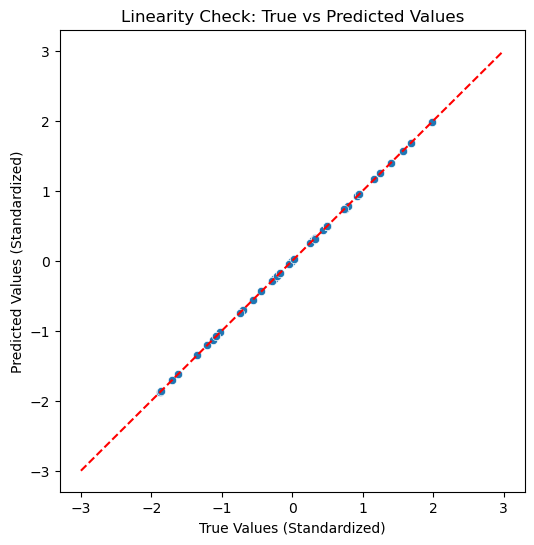

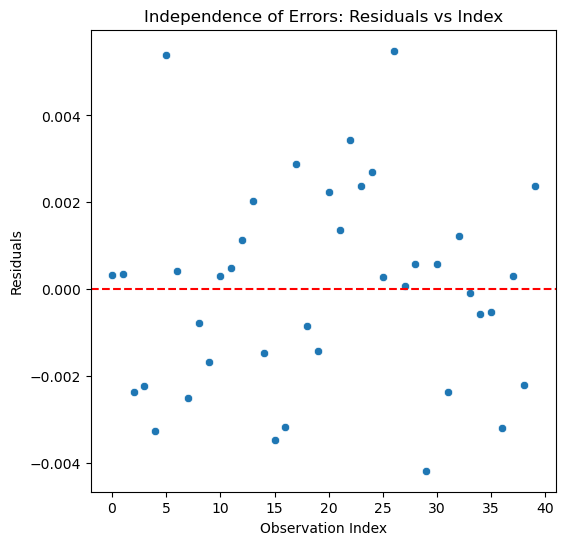

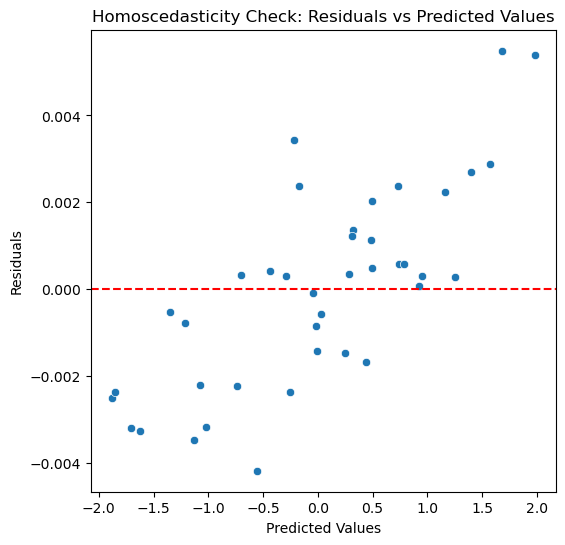

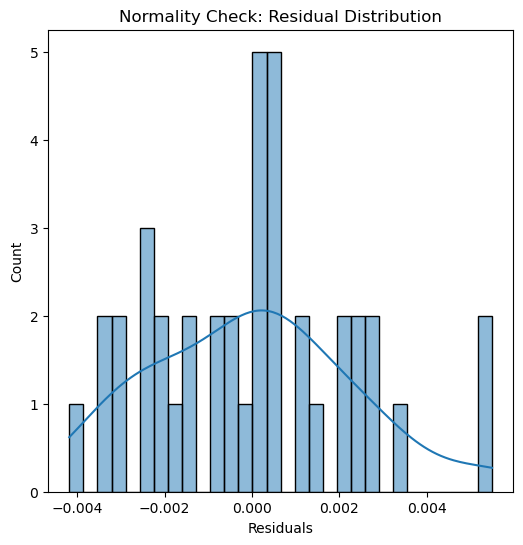

Shapiro-Wilk Test: p-value = 0.391. Residuals are approximately normal.


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Fit Ridge regression (you can also replace this with Lasso if desired)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred = ridge.predict(X_train_scaled)
residuals = y_train_scaled - y_pred

# 1. Linearity Test: Plot actual vs. predicted values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_train_scaled, y=y_pred)
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')  # Line of perfect fit
plt.xlabel('True Values (Standardized)')
plt.ylabel('Predicted Values (Standardized)')
plt.title('Linearity Check: True vs Predicted Values')
plt.show()

# 2. Independence of Errors: Plot residuals
plt.figure(figsize=(6, 6))
sns.scatterplot(x=np.arange(len(residuals)), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Independence of Errors: Residuals vs Index')
plt.show()

# 3. Homoscedasticity Test: Residuals vs Predicted Values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs Predicted Values')
plt.show()

# 4. Normality of Errors: Histogram and Shapiro-Wilk Test
plt.figure(figsize=(6, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Normality Check: Residual Distribution')
plt.show()

# Shapiro-Wilk Test for normality
stat, p_value = shapiro(residuals)
if p_value > 0.05:
    print(f"Shapiro-Wilk Test: p-value = {p_value:.3f}. Residuals are approximately normal.")
else:
    print(f"Shapiro-Wilk Test: p-value = {p_value:.3f}. Residuals are not normally distributed.")


In [53]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset (replace with your actual data)
X = pd.read_csv("gene.csv") 
y = pd.read_csv("phenotype.csv")       # Phenotype data

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)



In [54]:
# Standardize the predictors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)        # Transform the test data

# Define the ElasticNet model
elastic_net = ElasticNet(max_iter=10000, random_state=42)  # Ensure convergence with high iterations

# Define hyperparameter grid for tuning
param_grid = {
    'alpha': [0.1, 1, 10],       # Regularization strength
    'l1_ratio': [0.2, 0.5, 0.8]  # Mix of L1 (Lasso) and L2 (Ridge) penalties
}


In [58]:

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Best Parameters: {'alpha': 1, 'l1_ratio': 0.8}
Mean Squared Error (MSE): 68624.97659719831
R² Score: -0.15535624349360555


In [74]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Example Dataset (Replace with your dataset)
# Assuming 'datasets' is a DataFrame where the last column is the target variable
X = pd.read_csv("Dataset.csv")
y = pd.read_excel("Pheno.xlsx")  # Target variable

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictors (X) and response (y)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Step 3: Fit Ridge Regression Model
ridge = Ridge(alpha=1.0)  # Default regularization strength
ridge.fit(X_train_scaled, y_train_scaled)

# Step 4: Make Predictions
y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

# Step 5: Evaluate the Model
train_r2 = r2_score(y_train_scaled, y_pred_train)
test_r2 = r2_score(y_test_scaled, y_pred_test)

n_train, p = X_train.shape  # Number of samples and features in the training set
n_test = X_test.shape[0]    # Number of samples in the test set

# Calculate Adjusted R2
adj_train_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
adj_test_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

print("Training R2:", train_r2)
print("Testing R2:", test_r2)
print("Adjusted Training R2:", adj_train_r2)
print("Adjusted Testing R2:", adj_test_r2)

# Step 6: Hyperparameter Tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train_scaled)

print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Best cross-validated R2 score:", ridge_cv.best_score_)

# Step 7: Refit the model with the best alpha
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_best.fit(X_train_scaled, y_train_scaled)

# Step 8: Make Predictions with the Optimized Model
y_pred_best = ridge_best.predict(X_test_scaled)
optimized_r2 = r2_score(y_test_scaled, y_pred_best)
n_test_optimized = X_test.shape[0]

adj_optimized_r2 = 1 - (1 - optimized_r2) * (n_test_optimized - 1) / (n_test_optimized - p - 1)
print("Optimized Testing R2:", optimized_r2)
print("Optimized Adjusted Testing R2:", adj_optimized_r2)


Training R2: 0.999995202368069
Testing R2: 0.9324425113460055
Adjusted Training R2: 1.0000011549854648
Adjusted Testing R2: 1.003166757280656
Best alpha: 0.01
Best cross-validated R2 score: 0.8094231722821059
Optimized Testing R2: 0.9330206908435349
Optimized Adjusted Testing R2: 1.0031396551167093


In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer

# Load your dataset
# Replace this with your dataset
# Assuming 'datasets' is a DataFrame where the last column is the target variable
X = pd.read_csv("Dataset.csv")
y = pd.read_excel("Pheno.xlsx")  # Target variable

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictors (X) and response (y)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Step 3: Apply PCA to reduce dimensionality
# Apply PCA to reduce dimensionality
n_components = min(40, X_train_scaled.shape[1])  # Use the smaller of the number of samples or features
pca = PCA(n_components=n_components)  # Set n_components to 40 or fewer
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 4: Fit Ridge Regression Model
ridge = Ridge(alpha=1.0)  # Default regularization strength
ridge.fit(X_train_pca, y_train_scaled)

# Step 5: Evaluate the Model with Cross-Validation
# Define custom scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Cross-validated R2 Score
cv_r2_scores = cross_val_score(ridge, X_train_pca, y_train_scaled, cv=5, scoring='r2')
mean_cv_r2 = np.mean(cv_r2_scores)
print("Cross-validated R2 scores:", cv_r2_scores)
print("Mean Cross-validated R2:", mean_cv_r2)

# Cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(ridge, X_train_pca, y_train_scaled, cv=5, scoring=mse_scorer)
mean_cv_mse = -np.mean(cv_mse_scores)  # Negate as cross_val_score minimizes the score
print("Cross-validated MSE scores:", -cv_mse_scores)
print("Mean Cross-validated MSE:", mean_cv_mse)

# Cross-validated Mean Absolute Error
cv_mae_scores = cross_val_score(ridge, X_train_pca, y_train_scaled, cv=5, scoring=mae_scorer)
mean_cv_mae = -np.mean(cv_mae_scores)  # Negate as cross_val_score minimizes the score
print("Cross-validated MAE scores:", -cv_mae_scores)
print("Mean Cross-validated MAE:", mean_cv_mae)

# Step 6: Test the model on the test set
y_pred_test = ridge.predict(X_test_pca)
test_r2 = r2_score(y_test_scaled, y_pred_test)
print("Testing R2:", test_r2)

# Step 7: Hyperparameter Tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train_pca, y_train_scaled)

print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Best cross-validated R2 score:", ridge_cv.best_score_)

# Step 8: Refit the Ridge model with the best alpha
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_best.fit(X_train_pca, y_train_scaled)

# Step 9: Evaluate the optimized Ridge model on the test set
y_pred_best = ridge_best.predict(X_test_pca)
optimized_r2 = r2_score(y_test_scaled, y_pred_best)
print("Optimized Testing R2:", optimized_r2)


Cross-validated R2 scores: [0.84701159 0.80740424 0.67591132 0.82212607 0.89195614]
Mean Cross-validated R2: 0.8088818707905897
Cross-validated MSE scores: [0.19295183 0.09098266 0.19186587 0.21735176 0.09277387]
Mean Cross-validated MSE: 0.1571851973889929
Cross-validated MAE scores: [0.33805844 0.24151112 0.38781164 0.37086886 0.24883941]
Mean Cross-validated MAE: 0.3174178927354179
Testing R2: 0.9324425113460054
Best alpha: 0.01
Best cross-validated R2 score: 0.809423172282106
Optimized Testing R2: 0.9330206908435348


In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'data' is your original dataset and 'phenotype' is the response variable
X = pd.read_csv("gene.csv")  # All gene expression data (features)
y = pd.read_csv("phenotype.csv")  # Phenotype data (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for better visualization (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Check the means and standard deviations after scaling
print("Mean of X_train after scaling: ", X_train_scaled_df.mean().values)
print("Standard deviation of X_train after scaling: ", X_train_scaled_df.std().values)


Mean of X_train after scaling:  [-2.35922393e-17 -8.32667268e-18  2.22044605e-17 ...  4.33680869e-17
  6.24500451e-18  2.77555756e-17]
Standard deviation of X_train after scaling:  [1.01273937 1.01273937 1.01273937 ... 1.01273937 1.01273937 1.01273937]


In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your dataset, and 'phenotype' is the response variable
X = pd.read_csv("gene.csv") # All gene expression data (features)
y = pd.read_csv("phenotype.csv")  # Phenotype data (target)

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features (X)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Fit the model on the standardized training data
rf_model.fit(X_train_scaled, y_train)

# Step 5: Get feature importances
feature_importances = rf_model.feature_importances_

# Step 6: Create a DataFrame to view feature importances
importance_df = pd.DataFrame({'Gene': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 7: Select the top 200 most important features
top_200_features = importance_df.head(200)['Gene'].tolist()

# Step 8: Print the top 200 selected features
print("Top 200 Selected Features:", top_200_features)



C:\Users\Shruti\AppData\Local\Temp\ipykernel_27296\3614439096.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_scaled, y_train)


Top 200 Selected Features: ['X2', 'X1871', 'X1248', 'X1672', 'X930', 'X200', 'X578', 'X875', 'X1674', 'X1887', 'X1270', 'X27', 'X859', 'X1831', 'X444', 'X448', 'X1824', 'X1', 'X575', 'X470', 'X1407', 'X1225', 'X252', 'X55', 'X1968', 'X1446', 'X355', 'X430', 'X288', 'X1281', 'X1062', 'X1663', 'X1250', 'X1255', 'X799', 'X1343', 'X1144', 'X436', 'X1180', 'X1005', 'X841', 'X336', 'X1889', 'X557', 'X1545', 'X836', 'X1946', 'X1977', 'X717', 'X1366', 'X1408', 'X1286', 'X1499', 'X92', 'X1267', 'X89', 'X1864', 'X629', 'X1442', 'X1257', 'X1206', 'X357', 'X1766', 'X1660', 'X990', 'X713', 'X1202', 'X319', 'X1338', 'X329', 'X612', 'X1925', 'X1731', 'X345', 'X894', 'X1382', 'X460', 'X788', 'X561', 'X664', 'X1052', 'X1051', 'X88', 'X1758', 'X1118', 'X601', 'X1920', 'X265', 'X1050', 'X1780', 'X1928', 'X839', 'X897', 'X1610', 'X765', 'X1046', 'X121', 'X803', 'X431', 'X1055', 'X616', 'X613', 'X1241', 'X142', 'X1015', 'X1818', 'X1562', 'X1878', 'X1667', 'X1335', 'X1830', 'X1405', 'X1983', 'X1884', 'X668'

In [86]:
X_top_200 = X[top_200_features]
print(X_top_200)

          X2     X1871     X1248     X1672      X930      X200      X578  \
0   0.253319 -1.842129 -0.381059  0.951097 -1.660818 -0.584148  0.811595   
1  -0.028547  1.130103 -0.319071  0.086341  0.877177  0.696958  0.373764   
2  -0.042870 -0.124321 -0.764545 -1.734094 -0.730610  0.944523 -0.094790   
3   1.368602  0.636024  1.293988  1.391548 -0.141189 -1.814611  0.020535   
4  -0.225771  0.559402  0.191185  1.257179  1.090660  0.563601  1.333273   
5   1.516471  0.914642  1.042028 -0.292983 -0.713585  0.972807  0.540196   
6  -1.548753 -0.830559  0.128919 -1.295426  0.729267 -0.680484 -0.442927   
7   0.584614  1.721267  0.609430  0.661758 -0.918699 -0.926534  1.936157   
8   0.123854  0.006117 -0.184915  1.596278  1.400881 -1.935961 -0.369675   
9   0.215942  1.609607  1.162499  1.045798 -0.186976  0.963542  0.438547   
10  0.379639 -0.648254 -0.700538 -0.481127  0.632528  2.083685 -0.673778   
11 -0.502323  0.515800 -1.914204  1.246162  0.390843 -0.116438  0.650721   
12 -0.333207

In [87]:
X_top_200.to_excel('top_200_selected_features.xlsx', index=False)

print("File has been saved as 'top_200_selected_features.xlsx'")

File has been saved as 'top_200_selected_features.xlsx'


In [90]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Example Dataset (Replace with your dataset)
# Assuming 'datasets' is a DataFrame where the last column is the target variable
X = pd.read_excel("top_200_selected_features.xlsx")
y = pd.read_excel("Pheno.xlsx")  # Target variable

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictors (X) and response (y)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Step 3: Fit Ridge Regression Model
ridge = Ridge(alpha=1.0)  # Default regularization strength
ridge.fit(X_train_scaled, y_train_scaled)

# Step 4: Make Predictions
y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

# Step 5: Evaluate the Model
train_r2 = r2_score(y_train_scaled, y_pred_train)
test_r2 = r2_score(y_test_scaled, y_pred_test)

n_train, p = X_train.shape  # Number of samples and features in the training set
n_test = X_test.shape[0]    # Number of samples in the test set

# Calculate Adjusted R2
adj_train_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
adj_test_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

print("Training R2:", train_r2)
print("Testing R2:", test_r2)
print("Adjusted Training R2:", adj_train_r2)
print("Adjusted Testing R2:", adj_test_r2)

# Step 6: Hyperparameter Tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train_scaled)

print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Best cross-validated R2 score:", ridge_cv.best_score_)

# Step 7: Refit the model with the best alpha
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_best.fit(X_train_scaled, y_train_scaled)

# Step 8: Make Predictions with the Optimized Model
y_pred_best = ridge_best.predict(X_test_scaled)
optimized_r2 = r2_score(y_test_scaled, y_pred_best)
n_test_optimized = X_test.shape[0]

adj_optimized_r2 = 1 - (1 - optimized_r2) * (n_test_optimized - 1) / (n_test_optimized - p - 1)
print("Optimized Testing R2:", optimized_r2)
print("Optimized Adjusted Testing R2:", adj_optimized_r2)


Training R2: 0.9999881234707781
Testing R2: 0.2177329462859755
Adjusted Training R2: 1.0000028769232276
Adjusted Testing R2: 1.0368607512221268
Best alpha: 0.01
Best cross-validated R2 score: 0.5680755247502873
Optimized Testing R2: 0.21848986813552385
Optimized Adjusted Testing R2: 1.0368250847475409
